In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [2]:
# Load the diabetes dataset
data_X, data_y = datasets.load_diabetes(return_X_y=True)

### Data visualization

In [3]:
# TO DO

### Data preprocessing / Data cleansing / Data transformation

In [4]:
# TO DO

### Training, validation, test data splitting

Split dataset into training set and test set first.

Further split the training set into training and validation sets.

In [5]:
# TO DO
train_X, train_y = data_X, data_y
valid_X, valid_y = data_X, data_y

### numpy

In [6]:
# model initialization
# Our X is assumed to have a shape of (Number of samples, Number of features)
# Our w is assumed to have a shape of (Number of features, )
def weights_init(X, seed=20):
    '''
        This is called a Doc String. It is a piece of string right after the 
        def line to explain the function to anyone. For how popular code repo 
        formats this Doc String, check out the source code of any popular
        library's function. It is highly suggested to list the expected shapes
        of all matrices.
    '''
    np.random.seed(seed)
    m, n = X.shape
    
    w = np.random.normal(loc=0.0, scale=1.0, size=((n,))) # We could have used other random function
    b = 0. # It is usual that we initialize b to zero. Not the difference between "0." and "0"
    
    return w, b

In [7]:
# You called it f_wb, which is a very popular name. I call it forward, to make it sound more like a Neural Network process.
# Note the importance of us clearly defined the shapes of X and w in the above cell, because any operation hereafter follows it.
def forward(X, w, b):
    '''
    
    '''
    return X @ w + b # @ is the operator for matrix multiplication. For details, please read https://numpy.org/doc/stable/reference/generated/numpy.matmul.html#numpy.matmul

In [8]:
def compute_cost(X, y, w, b):
    '''
    
    '''
    m, n = X.shape
    error = forward(X, w, b) - y # what is the expected shape?
    cost = 1/m * error @ error
    return cost

In [9]:
def compute_gradient(X, y, w, b):
    '''
    
    '''
    m, n = X.shape
    error = forward(X, w, b) - y # what is the expected shape?
    dw = 1/m * error @ X # what is the expected shape? should be equal to w, right?
    db = 1/m * np.sum(error)
    
    return dw, db

In [10]:
def gradient_descent(X, y, w, b, learning_rate):
    '''
    
    '''
    dw, db = compute_gradient(X, y, w, b)
    w -= learning_rate * dw
    b -= learning_rate * db
    
    return w, b

In [11]:
def fit(X, y, w, b, learning_rate, epochs): #epochs means number of iterations. epochs is the term often used in neural network training
    for epoch in range(epochs):
        w, b = gradient_descent(X, y, w, b, learning_rate)
        cost = compute_cost(X, y, w, b)
        
        if epoch % 500 == 0 or epochs - 1 == epoch:
            print(f'epoch {epoch: 5d} train cost {cost:.6f}')
            
    return w, b

In [12]:
# fit
numpy_w, numpy_b = weights_init(train_X)
numpy_w, numpy_b = fit(train_X, train_y, numpy_w, numpy_b, learning_rate=0.1, epochs=10000)

epoch     0 train cost 24681.411215
epoch   500 train cost 4580.305665
epoch  1000 train cost 3938.291407
epoch  1500 train cost 3603.639256
epoch  2000 train cost 3408.913914
epoch  2500 train cost 3283.159505
epoch  3000 train cost 3195.053720
epoch  3500 train cost 3129.847747
epoch  4000 train cost 3079.942706
epoch  4500 train cost 3040.986744
epoch  5000 train cost 3010.219629
epoch  5500 train cost 2985.741730
epoch  6000 train cost 2966.170173
epoch  6500 train cost 2950.462366
epoch  7000 train cost 2937.815697
epoch  7500 train cost 2927.604565
epoch  8000 train cost 2919.337579
epoch  8500 train cost 2912.626782
epoch  9000 train cost 2907.164728
epoch  9500 train cost 2902.707050
epoch  9999 train cost 2899.065607


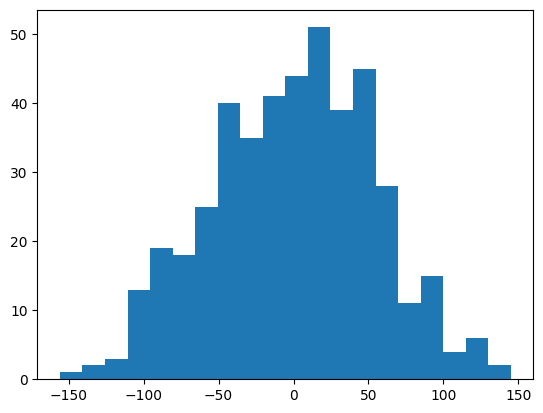

In [13]:
# plot errors
numpy_error = forward(valid_X, numpy_w, numpy_b) - valid_y
numpy_h, numpy_b, numpy_patches = plt.hist(numpy_error, bins=20)

### numpy in class

In [14]:
class NumpyLinearRegression:
    def __init__(self, seed=20):
        self.seed = seed
    
    def fit(self, X, y, learning_rate, epochs):
        self.weights_init(X)
        
        for epoch in range(epochs):
            self.gradient_descent(X, y, learning_rate)
            cost = self.compute_cost(X, y)

            if epoch % 500 == 0 or epochs - 1 == epoch:
                print(f'epoch {epoch: 5d} train cost {cost:.6f}')
                
        return self
        
    def weights_init(self, X):
        '''

        '''
        np.random.seed(self.seed)
        m, n = X.shape

        self.w = np.random.normal(loc=0.0, scale=1.0, size=((n,)))
        self.b = 0.
        
    def forward(self, X):
        '''

        '''
        return X @ self.w + self.b

    def compute_cost(self, X, y):
        '''

        '''
        m, n = X.shape
        error = self.forward(X) - y
        cost = 1/m * error @ error
        return cost

    def compute_gradient(self, X, y):
        '''

        '''
        m, n = X.shape
        error = self.forward(X) - y
        dw = 1/m * error @ X
        db = 1/m * np.sum(error)

        return dw, db

    def gradient_descent(self, X, y, learning_rate):
        '''

        '''
        dw, db = self.compute_gradient(X, y)
        self.w -= learning_rate * dw
        self.b -= learning_rate * db

In [15]:
# fit
numpy_lr = NumpyLinearRegression().fit(train_X, train_y, learning_rate=0.1, epochs=10000)
numpy_w, numpy_b = numpy_lr.w, numpy_lr.b

epoch     0 train cost 24681.411215
epoch   500 train cost 4580.305665
epoch  1000 train cost 3938.291407
epoch  1500 train cost 3603.639256
epoch  2000 train cost 3408.913914
epoch  2500 train cost 3283.159505
epoch  3000 train cost 3195.053720
epoch  3500 train cost 3129.847747
epoch  4000 train cost 3079.942706
epoch  4500 train cost 3040.986744
epoch  5000 train cost 3010.219629
epoch  5500 train cost 2985.741730
epoch  6000 train cost 2966.170173
epoch  6500 train cost 2950.462366
epoch  7000 train cost 2937.815697
epoch  7500 train cost 2927.604565
epoch  8000 train cost 2919.337579
epoch  8500 train cost 2912.626782
epoch  9000 train cost 2907.164728
epoch  9500 train cost 2902.707050
epoch  9999 train cost 2899.065607


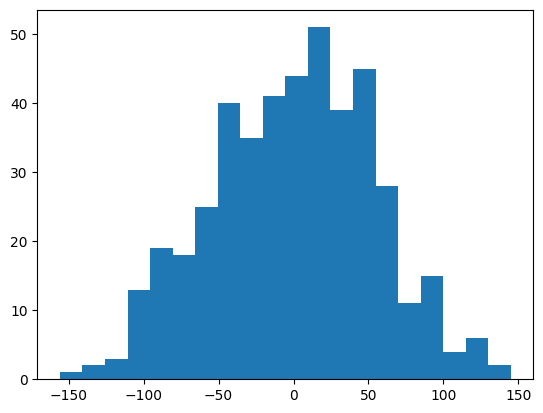

In [16]:
# plot errors
numpy_error = numpy_lr.forward(valid_X) - valid_y
numpy_h, numpy_b, numpy_patches = plt.hist(numpy_error, bins=20)

### Sklearn

In [17]:
# fit
sklearn_lr = LinearRegression().fit(train_X, train_y)
sklearn_w, sklearn_b = sklearn_lr.coef_, sklearn_lr.intercept_

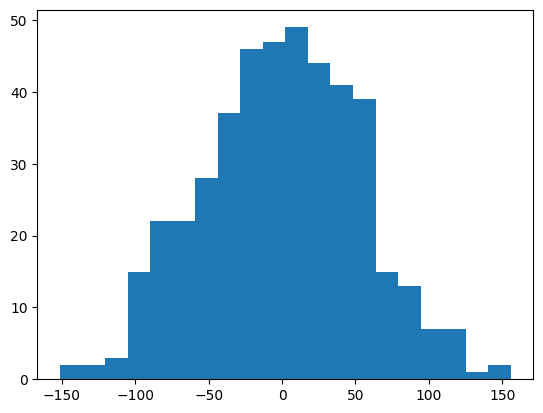

In [18]:
sklearn_error = sklearn_lr.predict(valid_X) - valid_y
sklearn_h, sklearn_b, sklearn_patches = plt.hist(sklearn_error, bins=20)

### Tensorflow

In [1]:
# TO DO

### Compare the error histograms

epoch     0 train cost 24681.411215
epoch   500 train cost 4580.305665
epoch  1000 train cost 3938.291407
epoch  1500 train cost 3603.639256
epoch  2000 train cost 3408.913914
epoch  2500 train cost 3283.159505
epoch  3000 train cost 3195.053720
epoch  3500 train cost 3129.847747
epoch  4000 train cost 3079.942706
epoch  4500 train cost 3040.986744
epoch  5000 train cost 3010.219629
epoch  5500 train cost 2985.741730
epoch  6000 train cost 2966.170173
epoch  6500 train cost 2950.462366
epoch  7000 train cost 2937.815697
epoch  7500 train cost 2927.604565
epoch  8000 train cost 2919.337579
epoch  8500 train cost 2912.626782
epoch  9000 train cost 2907.164728
epoch  9500 train cost 2902.707050
epoch  9999 train cost 2899.065607


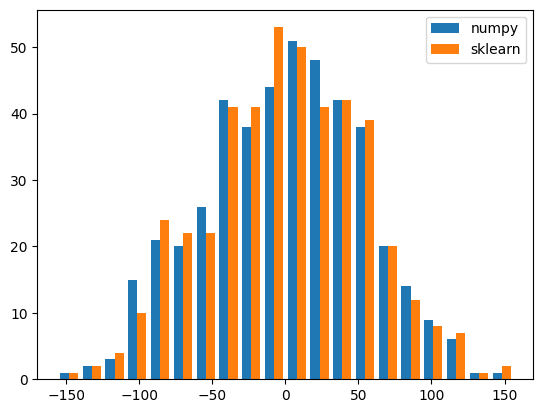

In [19]:
numpy_lr = NumpyLinearRegression().fit(train_X, train_y, learning_rate=0.1, epochs=10000)
numpy_w, numpy_b = numpy_lr.w, numpy_lr.b
numpy_error = numpy_lr.forward(valid_X) - valid_y

sklearn_lr = LinearRegression().fit(train_X, train_y)
sklearn_w, sklearn_b = sklearn_lr.coef_, sklearn_lr.intercept_
sklearn_error = sklearn_lr.predict(valid_X) - valid_y

_ = plt.hist([numpy_error, sklearn_error], bins=20, label=['numpy', 'sklearn'])
_ = plt.legend()

### Hyperparameters tuning and CV 

In [20]:
# TO DO

### Others
Modify this notebook to add L2 regularization

Modify this notebook to add Adam optimizer in numpy and tensorflow

Create a new notebook for Logistic Regression